In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import time
import re
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("CSV_data/housePrice.csv")
df_org = df.copy()
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [38]:
len(df_org['Address'].unique())

193

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 146.2+ KB


In [7]:
def nans(df): return df[df.isnull().any(axis=1)]
nans(df)



,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60.0,2,True,True,True,NaN,2.650000e+09,88333.33
570,NaN,2,True,True,True,Ostad Moein,3.310000e+09,110333.33
662,85.0,2,True,True,True,NaN,1.955000e+09,65166.67
706,117.0,2,True,True,True,NaN,6.500000e+09,216666.67
709,NaN,3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,NaN,2,True,True,False,Damavand,7.000000e+09,233333.33
1108,77.0,2,True,True,False,NaN,2.020000e+09,67333.33
1109,71.0,1,True,True,True,NaN,2.300000e+09,76666.67
1577,100.0,2,True,True,True,NaN,3.100000e+09,103333.33
1604,NaN,2,True,True,True,Gheitarieh,8.700000e+09,290000.00


In [8]:
#Showing the values that caused the Area column to become an object

nulls_Area_index = np.where(df["Area"].isna())[0]
print(f"The index of nulls in Area is :{nulls_Area_index}")
for index in nulls_Area_index:
    print(df_org.Area[index])

The index of nulls in Area is :[ 570  709  807 1604 2171 2802]
 3,310,000,000 
 16,160,000,000 
 1,000 
 8,400,000,000 
 3,600 
 2,550,000,000 


In [9]:
df['Area'] = df_org['Area'].apply(lambda X : re.sub(',','',X))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')
df.Area.dtype

dtype('int64')

In [10]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [11]:
# drop missing value of Address becuase is important param that irreplacable
df.dropna(subset=['Address'], inplace=True)
df.reset_index(drop=True,inplace=True)
df.isnull().sum().sum()

0

In [12]:
df.shape

(3456, 8)

In [13]:
df['Parking'].value_counts(normalize = True)*100


Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64

In [14]:
pd.crosstab(df['Parking'],df['Room'])

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [15]:
df['Address'].unique(),len(df['Address'].unique())


(array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
        'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
        'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
        'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
        'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
        'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
        'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
        'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
        'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
        'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
        'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
        'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
        'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
        'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
        'Northren Jamalzadeh', 'Azarbaijan', 'Ba

In [16]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [17]:
df.sample(2)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1966,500,4,True,True,False,Damavand,20000000000,666667
1614,88,2,True,True,True,Punak,2980000000,99333


In [18]:
df_org.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)
df_org.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333


In [19]:
df.groupby(['Parking','Room'])['Price'].mean()

Parking  Room
False    0       9769750000
         1       1139677778
         2       1501674180
         3       5107865385
         4       6200000000
         5       9999000000
True     0        223500000
         1       2031368545
         2       3592919541
         3      11153730496
         4      25881492754
         5      37972857143
Name: Price, dtype: float64

In [20]:
df.groupby(['Elevator','Warehouse'])['Price'].mean()

Elevator  Warehouse
False     False       3139762937
          True        3761436318
True      False       1846046358
          True        6085066770
Name: Price, dtype: float64

## Visualization

In [ ]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

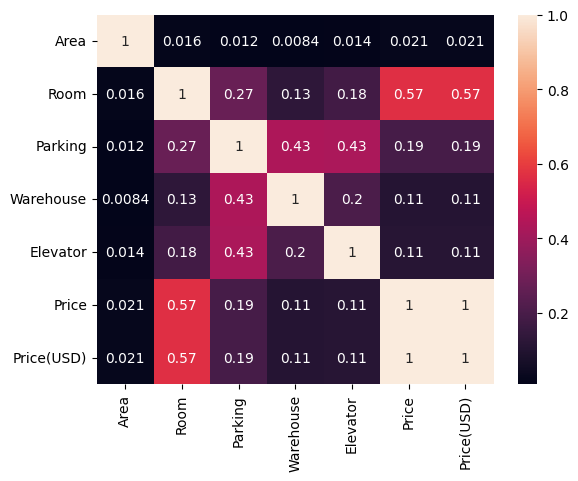

In [ ]:
sns.heatmap(df.drop('Address',axis='columns',inplace=False).corr(), annot=True)
plt.show()

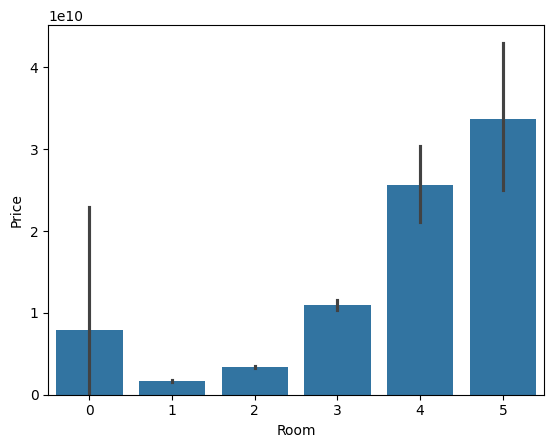

In [ ]:
sns.barplot(df, x=df.Room, y=df.Price)
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

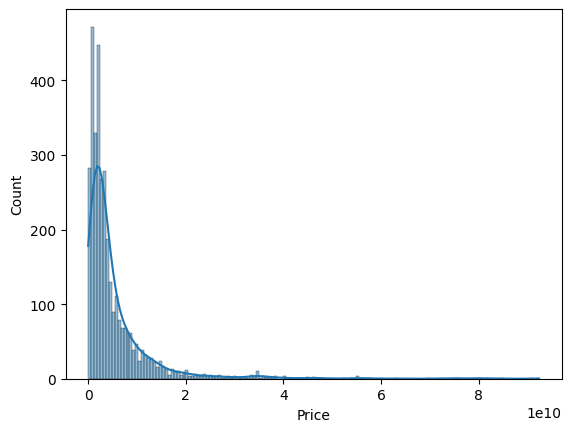

In [ ]:
sns.histplot(df['Price'], kde=True)

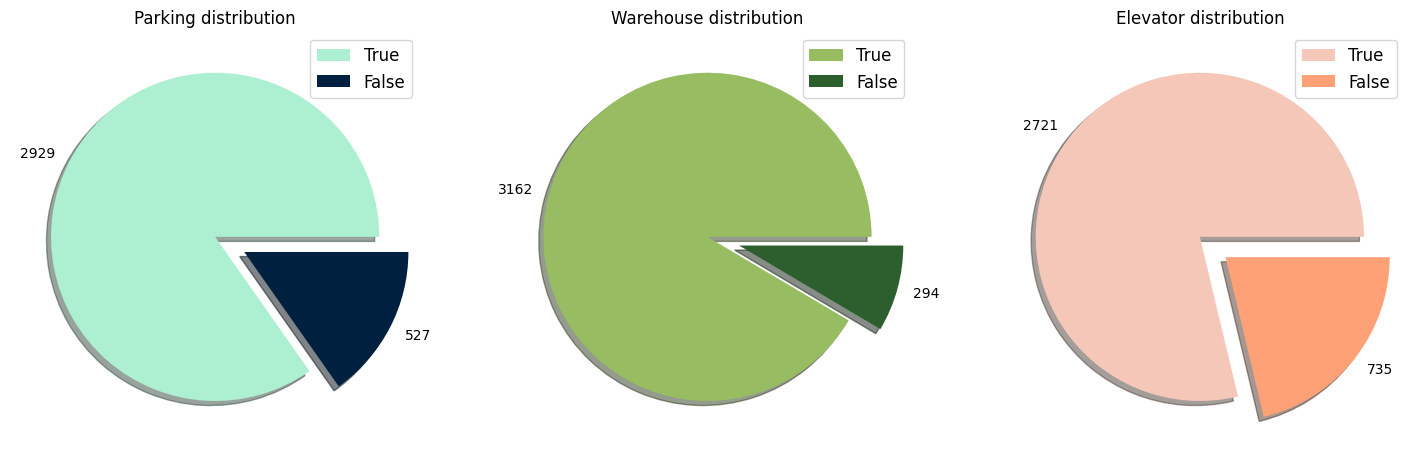

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

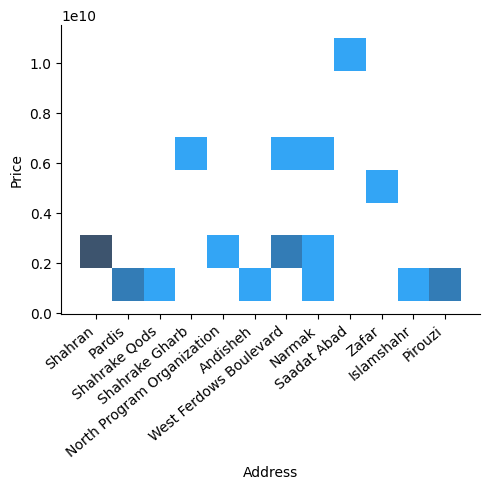

In [ ]:
ax = sns.displot(x=df['Address'].head(20), y=df.Price)
ax.set_xticklabels(rotation=40, ha="right")
plt.tight_layout()
plt.show()

#  Preprocessing #

In [21]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [22]:
df.drop(columns = ['Price(USD)'], inplace=True)
# Price USD and Price have same effect and I drop it
Boolean_ft = ['Parking','Warehouse','Elevator']

df[Boolean_ft] = df[Boolean_ft].astype('int64')

df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
1805,87,2,1,1,1,Pardis,570000000
2982,83,2,1,1,1,Shahran,3200000000
3167,190,3,1,1,1,Niavaran,15200000000
2029,84,2,1,1,1,Gheitarieh,7400000000
1414,75,2,1,1,1,Punak,2980000000


In [23]:
print("skew feature: \n",df.drop('Address',axis='columns',inplace=False).skew())

skew feature: 
 Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


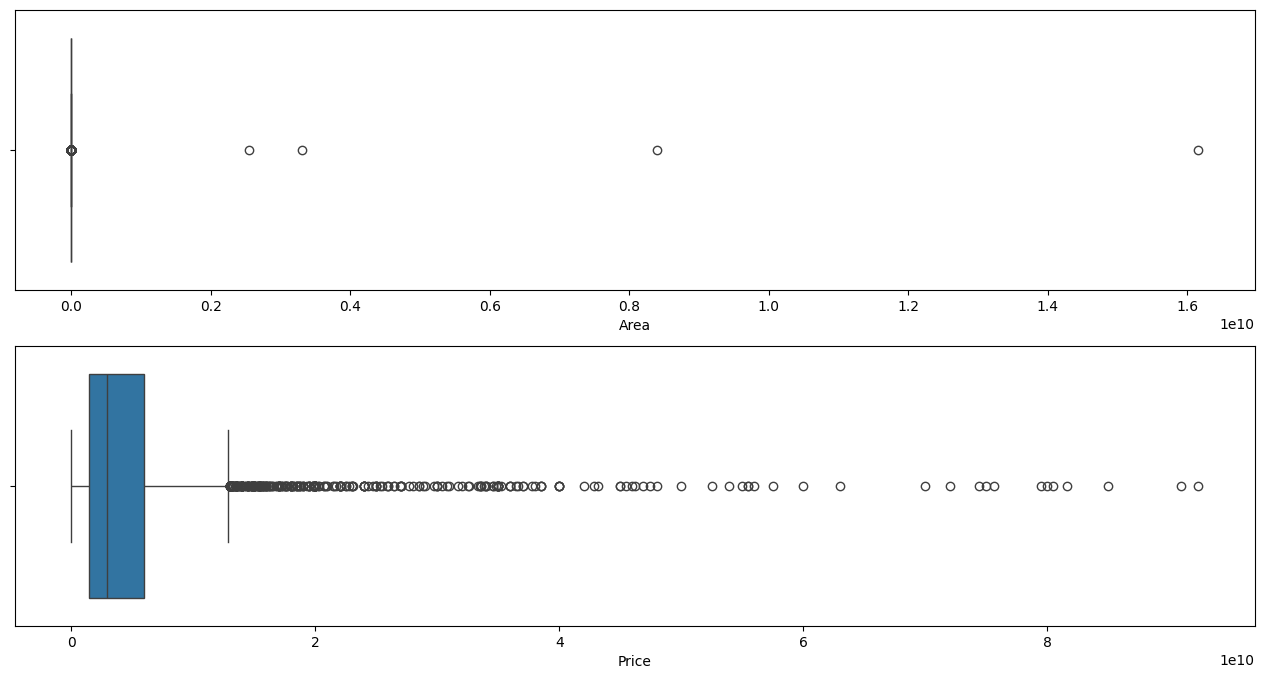

In [24]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])
plt.show()

In [25]:
#show outlier of boxplot
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [26]:
#total outlier and drop them
areaOutliers = np.where(df.Area>upper_area)
priceOutliers = np.where(df.Price>upper_price)
totalOutliers = np.union1d(areaOutliers, priceOutliers)
print(f"this dataset have {len(totalOutliers)} outliers\n",f"before {df.shape}")

df.drop(totalOutliers, axis=0, inplace =True)
df.reset_index(drop=True,inplace=True)
print(f"after drop outliers{df.shape}")

this dataset have 366 outliers
 before (3456, 7)
after drop outliers(3090, 7)


In [27]:
print("skew feature after drop outliers: \n",df.drop('Address',axis='columns',inplace=False).skew())

skew feature after drop outliers: 
 Area         1
Room         0
Parking     -2
Warehouse   -3
Elevator    -1
Price        1
dtype: float64


In [28]:
#one hot encoding
address_dummy = pd.get_dummies(df['Address'])
df = df.merge(address_dummy, left_index = True, right_index = True)
df.drop(columns = 'Address', inplace = True)
df.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# 0 and 1 -->False and True
Address_name = df.columns[6::]
df[Address_name] = df[Address_name].astype('int64')
df.head()


,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.to_csv("clean_home_Data.csv", index=False)

In [ ]:
#remove duplicate
# print(f"duplicated:{sum(df.duplicated())}\n shape:{df.shape}")
# df = df.drop_duplicates()
# print(f"after drop duplicated:{sum(df.duplicated())}\n shape:{df.shape}")

# Model

In [46]:

#Avoid Data Leakage When Performing Data Preparation

X = df.drop(columns='Price')
y = df['Price']
#normalize 0-1 
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_new = scaler.fit_transform(X)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
#split train and test 85 and 15
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.15, random_state=2023)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Xtrain shape:{X_train.shape}\n ytrain shape:{y_train.shape}\n Xtest shape:{X_test.shape}\n ytest shape:{y_test.shape}")

Xtrain shape:(2626, 192)
 ytrain shape:(2626,)
 Xtest shape:(464, 192)
 ytest shape:(464,)


In [49]:
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1),
                       n_jobs=-1)
    grid_fit = grid.fit(X_train, y_train, plot = True)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
       
    return train_score, test_score, RMSE, y_pred

In [51]:
model = CatBoostRegressor(random_seed=432013,verbose=False, early_stopping_rounds=100)
param = {'learning_rate': [0.3],
         'iterations':[750],
         "bootstrap_type": ["Bayesian", "Bernoulli", "MVS"],
         "boosting_type": ["Ordered", "Plain"],
        'depth':[5],
        'l2_leaf_reg':[8]}
#'min_child_samples': [1,4]


trainscore,testscore,RMSE_score, ypred = parameter_finder(model, param)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

The best parameters for <catboost.core.CatBoostRegressor object at 0x000000547080FAF0> model is: {'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'depth': 5, 'iterations': 750, 'l2_leaf_reg': 8, 'learning_rate': 0.3}
--------------------
(R2 score) in the training set is 90.25% for <catboost.core.CatBoostRegressor object at 0x000000547080FAF0> model.
(R2 score) in the testing set is 89.73% for <catboost.core.CatBoostRegressor object at 0x000000547080FAF0> model.
RMSE is 885,760,332.6624362 for <catboost.core.CatBoostRegressor object at 0x000000547080FAF0> model.
--------------------
Runtime of the program is: 78.78


In [ ]:
df_pred= pd.DataFrame({'true': y_test , 'pred': ypred} )
df_pred['difference'] = df_pred['pred']  - df_pred['true']
df_pred = df_pred.sort_values('difference', ascending=False)
df_pred = pd.merge(df_pred, df_org, how='left', left_index=True, right_index=True)
plot_data = df_pred.reset_index(drop=True)
plot_data = plot_data.drop(['Price','Price(USD)'],axis=1)
newdf = plot_data[['true', 'pred']].copy()

fig = px.scatter(newdf, hover_name=plot_data['Address'])
fig.add_vrect(x0="0", x1="120", col=1,
              annotation_text="Undervalue", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)

fig.add_vrect(x0="125", x1="497", col=1,
              annotation_text="Normal", annotation_position="top left",
              fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_vrect(x0="500", x1="630", col=1,
              annotation_text="Overvalue", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.add_bar(x=newdf.index, y=plot_data['difference'] ,name='difference')
fig.show()

In [ ]:
sns.barplot(x=['train score','tests core'],y=[trainscore,testscore])
plt.title("CatBoost")
plt.yticks(np.arange(0,1.1,0.1))
plt.show()